# Decision Tree
> 분류와 회귀 모두에 사용되는 지도학습 알고리즘으로 분석 과정이 직관적이며, 이해와 설명이 쉽다는 장점이 있다.  
> 분석 과정을 시각적으로 확인할 수 있다는 장점이 있다 -> 화이트박스 모델  
> 하지만 과적합으로 모델 성능이 떨어지기 쉽기 때문에 트리 크기를 제한하는 튜닝이 필요하다.

## 불순도
> Decision Tree에서 분기 기준을 선택하기 위해서 불순도(impurity)라는 개념을 사용한다.  
> 불순도는 복잡성을 의미하며 해당 범주 안에서 서로 다른 데이터가 얼마나 섞여 있는지를 뜻하며 다양한 개체들이 섞여 있을수록 불순도가 높다.  

- **지니 불순도**
    - 지니 불순도 = $1 - (양성 클래스 비율^2 + 음석 클래스 비율^2)$이며 $ Gini = 1 - \sum^c_{i=1}(p_i)^2 $으로 정리할 수 있다.
    - 지니 불순도는 분류 후 얼마나 잘 분류했는지 평가하는 지표로 불순도가 얼마나 감소했는지를 확인하여 알 수 있다.
    - 지니 불순도의 특징으로는 이진 분류로 나뉠 때 사용되며 0 ~ 0.5 사이의 값을 가지게 된다. 완벽하게 분류되었다면 0, 완벽하게 섞였다면 0.5이다.
    - 지니 불순도가 낮은 속성으로 의사결정 트리 노드를 결정한다.
    - 이 때 학습 데이터를 너무 완벽하게 분류한다면 과대적합이 발생할 수 있으니 주의해야 한다.<br>
- **엔드로피**
    - 엔트로피는 가지고 있는 데이터에서 어떤 기준으로 데이터를 나눈 경우 나누기 전보다 에트로피가 감소하는지를 확인하는 방법으로 사용하며 엔트로피가 감소했다면 모델 내부에서는 정보 이득을 얻었다고 생각한다.
    - 엔트로피 = $ -음성클래스비율 X log_2(음성클래스비율) - 양성클래스비율 X log_2(양성클래스비율)$이며 $ Entropy = -\sum_{i=1}^mp_ilog_2(p_i) $로 정리할 수 있다.<br>
- **정보 이득(Information Gain)**
    - 엔트로피는 속성의 불순도를 표현해주었다. 정보 이득은 어떤 속성이 얼마나 많은 정보를 제공하는가를 구한다.
    - 정보 이득 공식은 $ Gain(T, X) = Entropy(T) - Entropy(T, X) $로 정리할 수 있다.
    - 이 때 정보이득이 크다는 것은 어떤 속성으로 분할할 때 불순도가 줄어든다는 뜻이다.
    - 모든 속성에 대해서 분할 후 정보 이득을 계산하고 정보 이득이 가장 큰 속성부터 분할한다.
   

## 가지치기
> 가지치기를 하지 않으면 모델이 학습 데이터에는 완벽한 결과를 내지만 평가 데이터에서는 그렇지 못 한다. 이것을 과대적합이라고 한다.  
> 이 때 하이퍼파라미터 값을 조절하여 가지치기를 할 수 있다. -> 학습 데이터에 대한 성능은 낮아지지만, 평가 데이터에 대한 성능을 높일 수 있다.    

## 주요 하이퍼 파라미터
- **max_depth**
    - 트리의 최대 깊이(기본값: None)
    - 기본값으로 설정하면 완벽히 분류될 때 까지 분할하거나, 노드가 갖는 샘플 개수가 min_samples_split 설정 값 보다 작아질 때 까지 계속 분할
    - 계속 분할되면 트리 깊이가 너무 깊어져 과적합이 발생할 수 있으니 적절한 값 설정 필요
- **min_samples_split**
    - 노드를 분할하기 위한 최소한의 샘플 개수(기본값: 2)
    - 값을 작게 설정할 수록 계속 분할되어 트리 깊이가 깊어져 과적합 발생 가능
    - 적절한 값을 지정해 과적합을 방지할 필요가 있음
- **min_samples_leaf**
    - 리프 노드가 되기 위한 최소한의 샘플 수(기본값: 1)
    - min_samples_split과 함께 과적합을 방지할 목적으로 사용
    - 불균형 클래스인 경우 이를 고려하여 작은 값을 설정할 필요가 있음
- **max_feature**
    - 최선의 분할을 위해 고려할 Feature 수(기본값: None)
    - 기본값으로 설정하면 모든 Feature를 사용해서 분할 수행
    - 정수형으로 선언하면 Feature 수, 실수형으로 선언하면 Feature 비율
    - 'sqrt'로 선언하면 전체 Feature 수의 루트 값
    - 'auto'로 설정하면 'sqrt'와 같은 의미
    - 'log'로 선언하면 log2(전체 Feature 수)
- **max_leaf_node** 
    - 리프 노드 최대 개수

## 실습

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [4]:
data = sns.load_dataset('iris')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

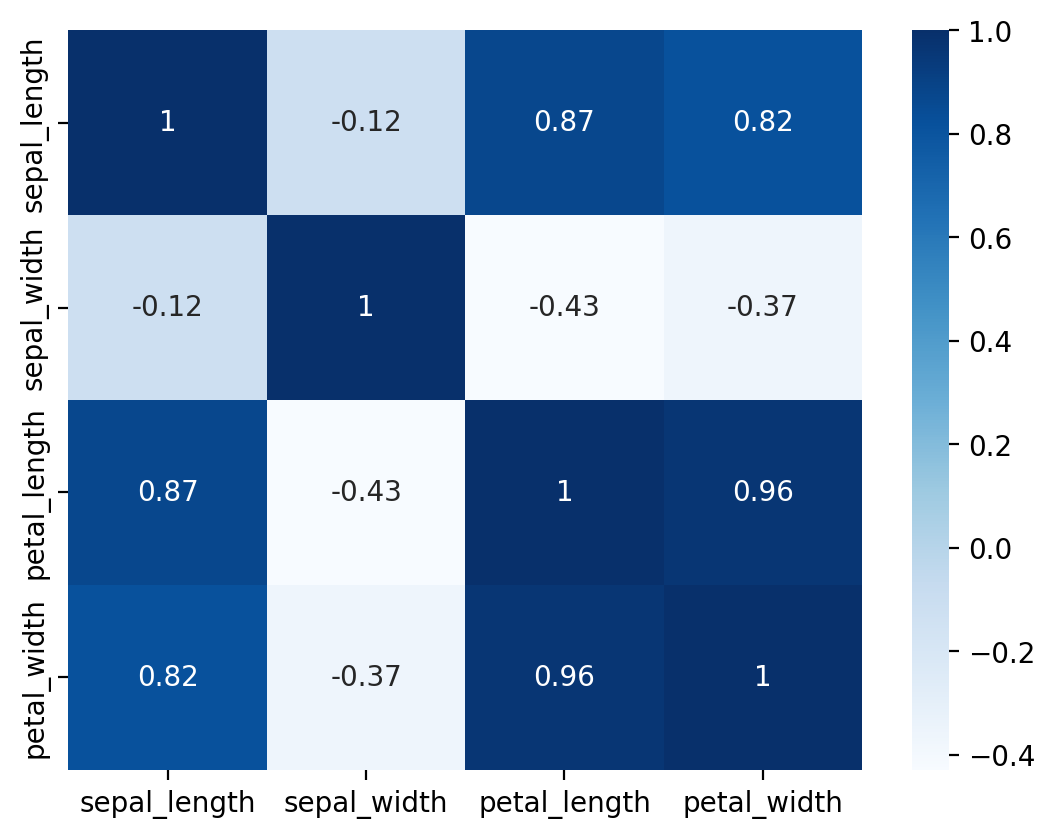

In [10]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [11]:
target = 'species'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [13]:
# 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [14]:
# 모델 선언하기
model = DecisionTreeClassifier()

In [15]:
# 모델 학습
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [16]:
# 예측하기
y_pred = model.predict(x_test)

In [17]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.94      0.97        16
   virginica       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Error: dot: can't open =: No such file or directory
Error: dot: can't open 300: No such file or directory


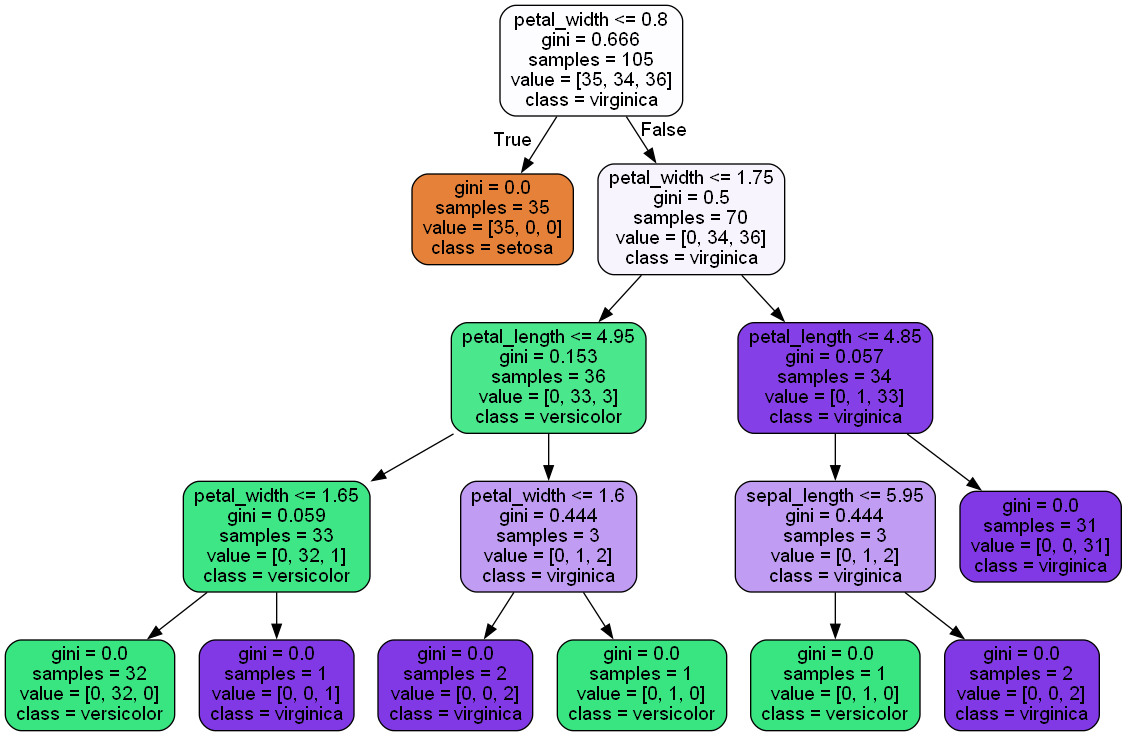

In [19]:
# 시각화
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(model,                                                        # 모델 이름
                out_file='tree.dot',                                          # 파일 이름
                feature_names=x.columns,                                      # Feature이름
                class_names=['setosa', 'versicolor', 'virginica'],            # Target class이름
                rounded=True,                                                 # 트리 모서리 모양 둥글게
                precision=3,                                                  # 불순도 소숫점 자리수
                max_depth=4,                                                  # 출력할 트리 최대 깊이 지정
                filled=True                                                   # 박스 내부 채우기
               )

# 파일 변환
!dot tree.dot -Tpng -otree.png -Gdpi = 300
# 이미지 파일 표시
Image(filename='tree.png')